# MAGIC

In this notebook, we use molecular cross-validation to find the optimal set of hyperparameters for the MAGIC algorithm on a dataset from

*David van Dijk, et al. Recovering Gene Interactions from Single-Cell Data Using Data Diffusion. 2018. Cell.*

We find that the optimal parameters produce a much less smooth picture of the relationship between three genes, *CDH1, VIM, ZEB1* than the default parameters do, indicating the importance of calibrating denoising methods.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

import scanpy as sc

import magic

from noise2self_sc.util import normalize_rows, mse

In [2]:
data = sc.read('../../../data/magic/HMLE_TGFb_day_8_10.csv.gz')

sc.pp.filter_cells(data, min_counts=1000)
sc.pp.filter_genes(data, min_cells=10)
data.X = data.X.astype(np.int)

In [3]:
x1 = np.random.binomial(data.X, 0.5)
x2 = data.X - x1

n_counts = np.median(data.X.sum(axis=1)) / 2

x1_norm = normalize_rows(x1, n_counts=n_counts)
x2_norm = normalize_rows(x2, n_counts=n_counts)

In [4]:
data1 = pd.DataFrame(
    data=x1_norm, index=data.obs_names, columns=data.var_names
)
data2 = pd.DataFrame(
    data=x2_norm, index=data.obs_names, columns=data.var_names
)

In [5]:
# MAGIC with defult parameters
# (the warning is a known bug and can be ignored, see
# https://github.com/KrishnaswamyLab/MAGIC/issues/152)
genes = ['VIM', 'CDH1', 'ZEB1']

default_denoised = magic.MAGIC().fit_transform(data1, genes=genes)
default_denoised = np.maximum(default_denoised, 0)

Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculating PCA...
    Calculated PCA in 10.17 seconds.
    Calculating KNN search...
    Calculated KNN search in 12.41 seconds.
    Calculating affinities...
    Calculated affinities in 5.50 seconds.
  Calculated graph and diffusion operator in 28.71 seconds.
  Calculating imputation...
    Automatically selected t = 8
  Calculated imputation in 1.98 seconds.
Calculated MAGIC in 32.35 seconds.


We tune three hyperparameters of the MAGIC method:
    
1. The number of neighbors to use in constructing the graph
2. The number of principal components used
3. The diffusion time

Default values:
    knn=10
    n_pca=100
    t='auto' (set to 7 for our dataset)
Optimal values:
    knn=4
    n_pca=20
    t=1

In [6]:
k_range = np.arange(2, 12, 2)
pc_range = np.arange(5, 30, 5)
t_range = np.arange(1, 5)

results = []

for n_pcs in pc_range:
    magic_op = magic.MAGIC(n_pca=n_pcs)
    for k in k_range:
        for t in t_range:
            magic_op.set_params(knn=k, t=t)
            denoised = magic_op.fit_transform(data1, genes=genes)
            denoised = np.maximum(denoised, 0)
            results.append((t, n_pcs, k, denoised))

Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.28 seconds.
    Calculating affinities...
    Calculated affinities in 0.20 seconds.
  Calculated graph and diffusion operator in 8.08 seconds.
  Calculating imputation...
Calculated MAGIC in 9.67 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.46 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.16 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.08 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.13 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.40 seconds.
    Calculating affinities...
    Calculated affinities in 0.28 seconds.
  Calculated graph and diffusion operator in 6.95 seconds.
  Calculating imputation...
Calculated MAGIC in 8.05 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.52 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.30 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.20 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.36 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.71 seconds.
    Calculating affinities...
    Calculated affinities in 0.37 seconds.
  Calculated graph and diffusion operator in 8.60 seconds.
  Calculating imputation...
Calculated MAGIC in 9.69 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.57 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.16 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.17 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.95 seconds.
    Calculating affinities...
    Calculated affinities in 0.56 seconds.
  Calculated graph and diffusion operator in 7.29 seconds.
  Calculating imputation...
Calculated MAGIC in 8.72 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.44 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.27 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.11 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.68 seconds.
  Calculated graph and diffusion operator in 7.85 seconds.
  Calculating imputation...
Calculated MAGIC in 9.06 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.45 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.12 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.15 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.89 seconds.
    Calculating affinities...
    Calculated affinities in 0.15 seconds.
  Calculated graph and diffusion operator in 8.82 seconds.
  Calculating imputation...
Calculated MAGIC in 9.94 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.49 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.29 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.11 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.27 seconds.
    Calculating affinities...
    Calculated affinities in 0.19 seconds.
  Calculated graph and diffusion operator in 7.31 seconds.
  Calculating imputation...
Calculated MAGIC in 8.68 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.48 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.20 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.32 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 8.71 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.36 seconds.
    Calculating affinities...
    Calculated affinities in 0.25 seconds.
  Calculated graph and diffusion operator in 11.49 seconds.
  Calculating imputation...
Calculated MAGIC in 13.03 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.58 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.22 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.42 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.61 seconds.
    Calculating affinities...
    Calculated affinities in 0.42 seconds.
  Calculated graph and diffusion operator in 8.02 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 9.15 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.49 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.20 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.35 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.80 seconds.
    Calculating affinities...
    Calculated affinities in 0.39 seconds.
  Calculated graph and diffusion operator in 7.96 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 9.22 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.51 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.13 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.13 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.64 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 8.87 seconds.
  Calculating imputation...
Calculated MAGIC in 10.41 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.50 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
Calculated MAGIC in 1.35 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.12 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.89 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 8.64 seconds.
  Calculating imputation...
Calculated MAGIC in 9.94 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.63 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.20 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.20 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.27 seconds.
  Calculated graph and diffusion operator in 10.35 seconds.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 11.68 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.49 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.54 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.58 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.31 seconds.
    Calculating affinities...
    Calculated affinities in 0.38 seconds.
  Calculated graph and diffusion operator in 9.17 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 10.30 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.48 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.15 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.31 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.58 seconds.
    Calculating affinities...
    Calculated affinities in 0.34 seconds.
  Calculated graph and diffusion operator in 10.15 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 11.30 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.51 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.54 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.50 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.15 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 10.00 seconds.
  Calculating imputation...
Calculated MAGIC in 11.17 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.77 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 1.14 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.38 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.13 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.49 seconds.
    Calculating affinities...
    Calculated affinities in 0.20 seconds.
  Calculated graph and diffusion operator in 9.00 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 10.11 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.48 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.16 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.29 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.66 seconds.
    Calculating affinities...
    Calculated affinities in 0.31 seconds.
  Calculated graph and diffusion operator in 9.16 seconds.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 10.63 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.62 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.29 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.18 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.81 seconds.
    Calculating affinities...
    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 9.50 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 10.83 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.66 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.20 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.51 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 6.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 4.00 seconds.
    Calculating affinities...
    Calculated affinities in 0.40 seconds.
  Calculated graph and diffusion operator in 10.98 seconds.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 12.55 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.50 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.17 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.25 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.06 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.60 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 9.05 seconds.
  Calculating imputation...
Calculated MAGIC in 10.38 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.55 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.15 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.27 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.97 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 9.25 seconds.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 10.46 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 1.54 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.35 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.55 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.91 seconds.
    Calculating affinities...
    Calculated affinities in 0.24 seconds.
  Calculated graph and diffusion operator in 9.58 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 10.86 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 1.61 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.57 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.55 seconds.
Calculating MAGIC...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 5.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 4.31 seconds.
    Calculating affinities...
    Calculated affinities in 0.40 seconds.
  Calculated graph and diffusion operator in 10.17 seconds.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 11.60 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.64 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.21 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.51 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


    Calculated PCA in 4.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 4.50 seconds.
    Calculating affinities...
    Calculated affinities in 0.38 seconds.
  Calculated graph and diffusion operator in 9.92 seconds.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 11.04 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.50 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.31 seconds.
Calculating MAGIC...
  Running MAGIC on 7523 cells and 18259 genes.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.30 seconds.


/opt/conda/lib/python3.7/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


Visualize the results of the hyperparameter sweep.

In [7]:
rows = []

for t, n_pcs, k, denoised in results:
    losses = mse(denoised, data2[genes])
    d = {"t": t, "n_pcs": n_pcs, "k": k, "loss": losses.sum()}
    for gene in genes:
        d[gene] = losses[gene]
    rows.append(d)

df = pd.DataFrame(rows)

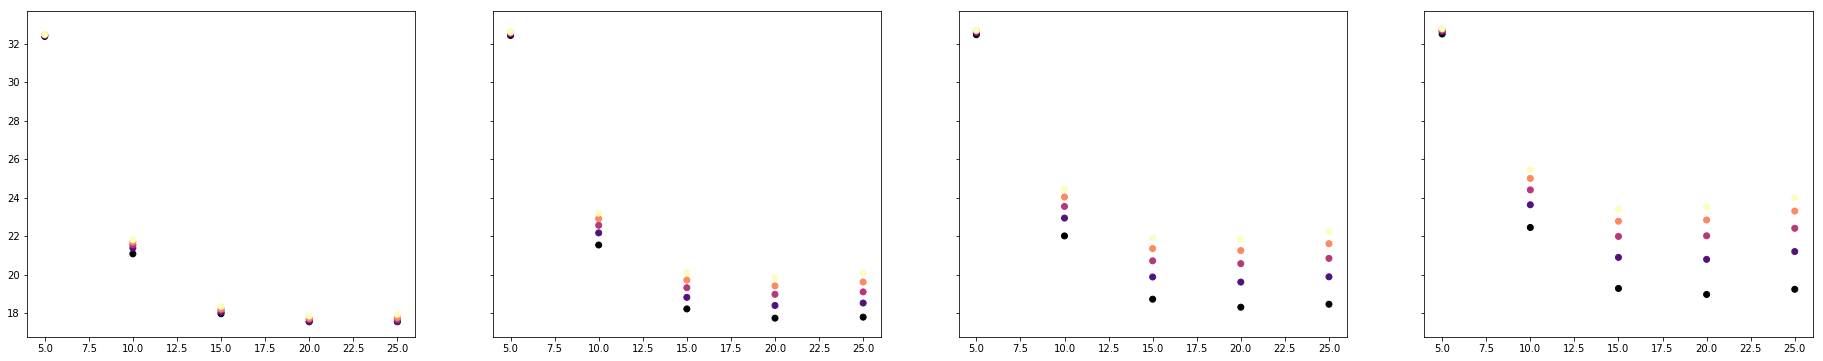

In [8]:
fig,ax = plt.subplots(1, len(t_range), sharey=True, figsize=(32, 6))

for i,t in enumerate(t_range):
    ix = df["t"] == t
    ax[i].scatter(df[ix]["n_pcs"], df[ix]["loss"], c=df[ix]["k"], cmap="magma")

plt.show()

The best-performing hyperparameters for MAGIC:

In [9]:
opt_idx = df['loss'].idxmin()

opt_denoised = results[opt_idx][-1]
opt_denoised = np.maximum(opt_denoised, 0)

df.loc[opt_idx][['k', 'n_pcs','t','loss']]

k         4.000000
n_pcs    20.000000
t         1.000000
loss     17.543962
Name: 64, dtype: float64

## Plot

In [10]:

def plot_dfs(dfs, titles, xticks, yticks, cbar_ticks):
    fig,ax = plt.subplots(
        len(dfs), 2,
        sharex=False,
        sharey=False,
        figsize=(8, 18),
        gridspec_kw={'width_ratios': [10, 1]},
    )

    cmap = plt.get_cmap('magma')
    for i,df in enumerate(dfs):
        norm = plt.Normalize(df[genes[2]].min(), df[genes[2]].max())

        ax[i,0].scatter(
            df[genes[0]], df[genes[1]], 
            c = df[genes[2]],
            cmap=cmap, 
            norm=norm,
            alpha=0.5
        )

        ax[i,0].set_xlabel(genes[0])
        ax[i,0].set_ylabel(genes[1])

        ax[i,0].set_xticks(xticks[i])
        ax[i,0].set_yticks(yticks[i])

        x_marg = np.ptp(xticks[i]) / 20
        y_marg = np.ptp(yticks[i]) / 20

        ax[i,0].set_xlim(-x_marg, None)
        ax[i,0].set_ylim(-y_marg, None)
        ax[i,0].margins(0.05)
        ax[i,0].autoscale_view()
        ax[i,0].set_title(titles[i])

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        plt.colorbar(
            sm,
            cax=ax[i,1], 
            label=genes[2],
            ticks=cbar_ticks[i]
        )

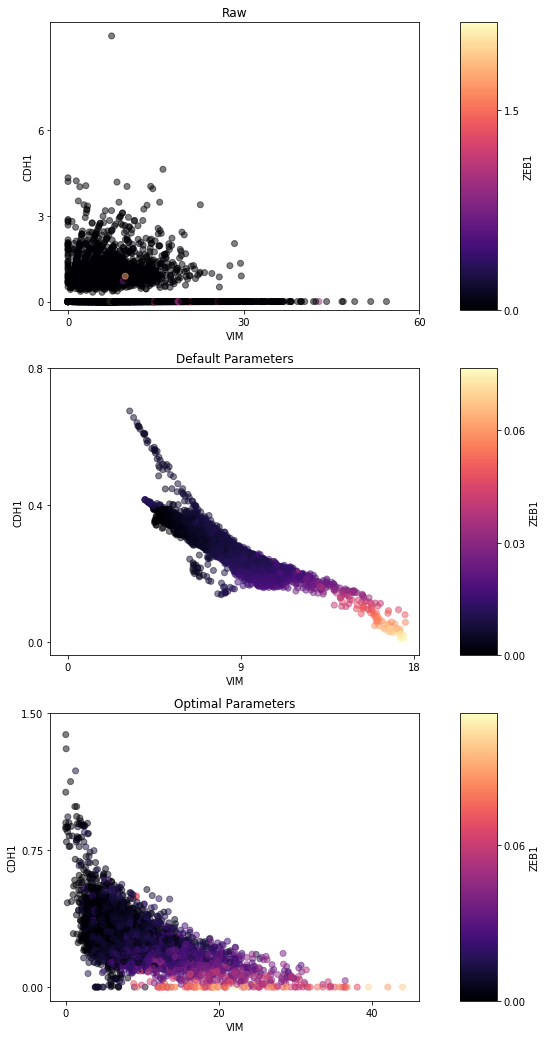

In [11]:
genes_idx = np.array([data.var_names.get_loc(g) for g in genes])
raw = pd.DataFrame(data = x1_norm[:, genes_idx], columns=genes)

plot_dfs(
    [raw, default_denoised, opt_denoised],
    ["Raw", "Default Parameters", "Optimal Parameters"],
    [[0, 30, 60], [0, 9, 18], [0, 20, 40]],
    [[0, 3, 6], [0, 0.4, 0.8], [0, 0.75, 1.5]],
    [[0, 1.5, 3], [0, 0.03, 0.06], [0, 0.06, 0.12]],
)
plt.savefig('../../figures/Figure_3_raw.svg')